### ABSTRACT:
#### The proliferation of fake news presents a significant challenge in today's digital age, affecting public discourse and societal well-being. This study addresses the prediction of fake news utilizing the K-Nearest Neighbors (KNN) algorithm. Leveraging a dataset containing news articles along with their titles, text, and corresponding labels (real or fake), KNN is employed to build a predictive model. Feature engineering techniques are applied to preprocess the data, extracting relevant features from the text.
#### The KNN algorithm is then trained on the processed dataset to classify news articles as real or fake based on their textual content. Performance evaluation metrics such as accuracy, precision, recall, and F1-score are utilized to assess the effectiveness of the model.
#### The findings of this study contribute to the development of techniques for combating fake news dissemination and promoting information integrity in the digital landscape.

### KNN detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv("fake_or_real_news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.shape

(6335, 4)

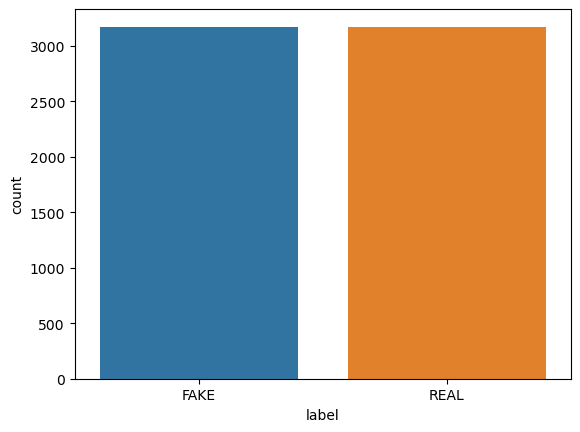

In [5]:
import seaborn as sns
ax = sns.countplot(x="label",data=df)

In [6]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [7]:
df.drop(['Unnamed: 0','title'],axis=1)

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL
...,...,...
6330,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [8]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [9]:
x=df['text']
y=df['label']
x.shape,y.shape

((6335,), (6335,))

In [10]:
x

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [11]:
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [14]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [16]:

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xv_train, y_train)
pred_knn = knn.predict(xv_test)
print(knn.score(xv_test, y_test))
print(classification_report(y_test, pred_knn))

0.7638888888888888
              precision    recall  f1-score   support

        FAKE       0.69      0.97      0.81       794
        REAL       0.95      0.55      0.70       790

    accuracy                           0.76      1584
   macro avg       0.82      0.76      0.75      1584
weighted avg       0.82      0.76      0.75      1584



Text(0, 0.5, 'accuracy')

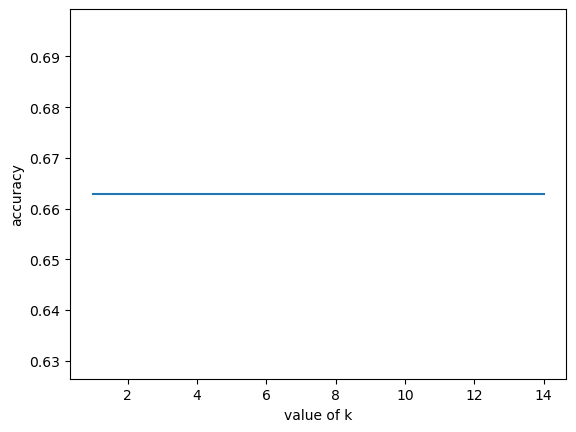

In [21]:
from sklearn import metrics
range_k=range(1,15)
scores={}
score_list=[]
for k in range_k:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xv_train,y_train)
    pred_knn=classifier.predict(xv_test)
    scores[k]=metrics.accuracy_score(y_test,pred_knn)
    score_list.append(metrics.accuracy_score(y_test,pred_knn))
    
%matplotlib inline
plt.plot(range_k,score_list)
plt.xlabel('value of k')
plt.ylabel('accuracy')   

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xv_train, y_train)
pred_knn = knn.predict(xv_test)
print(knn.score(xv_test, y_test))
print(classification_report(y_test, pred_knn))

0.80239898989899
              precision    recall  f1-score   support

        FAKE       0.75      0.91      0.82       794
        REAL       0.89      0.69      0.78       790

    accuracy                           0.80      1584
   macro avg       0.82      0.80      0.80      1584
weighted avg       0.82      0.80      0.80      1584



In [22]:
import joblib
joblib.dump(knn,'knn_model2.joblib')

['knn_model2.joblib']